# Google Colab Specific Setup

## For getting files on Googl Drive and to Open in Colab

First download the files from the lab and uploade them to google drive near the top level. Then go to this folder in your browser and click on column of dots to the right of the *.ipynb file. Select "Open With". If "Google Collaboratory" appears choose it. If it does not appear go to the bottom of the list and choose "Connect more apps" and then install "Google Collaboratory". Close browser, reopen, and try again. Now "Google Collaboratory" should appear when you select "Open With". You should also just be able to double click on the *.ipynb file.

This cell links your Google drive to the Colab session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here, modify the path where you saved this notebook and the associated lab files on your Google drive. This can be obtained in colab

In [ ]:
path = '/content/drive/MyDrive/SPE/'

Check the path name is assigned correctly.

In [ ]:
!echo $path
import os
os.path.isdir(path)

/content/drive/MyDrive/SPE_day3+4/


True

In [ ]:
# This is needed so can import packages from a different path than standard libraries
import sys
sys.path.append(path)

Check the Python packages that are available by default in the Colab environment.

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.33.0
aiohappyeyeballs                 2.4.0
aiohttp                          3.10.5
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.14
albumentations                   1.4.14
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.18.0
asn1crypto                       1.5.1
astropy                          6.1.3
astropy-iers-data                0.2024.8.27.10.28.29
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            24.2.0
audioread             

Need to install some python packages which is not present on Colab environement by default.

In [ ]:
!pip install rdkit
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled 

# Overview of Machine Learning and Polymer Informatics

Authors: Tianle Yue, Laboratory for Polymer Difital Engineering, University of Wisconsin–Madison.

This lab introduces students to an end-to-end example of applying a machine learning (ML) workflow to a polymer informatic dataset to address a research problem. The lab aims at deepening the conceptual understanding of ML, and while procedural skills such as writing Python code are not the focus of this lab, students will gain experience with a number of standard open source packages by interacting with code snippets through the Jupyter Notebook format and describing what each essential command does.

If you're unfamiliar with Jupyter Notebooks, take a moment to read about the lesson format.

## Jupyter Notebook Tips and Tricks

#### Cells
Each individual part of this notebook is known as a cell. The orange highlight bar along the left edge of this page indicates which cell is active.

#### Moving between active cells
You can move between cells by hitting the `up` and `down` arrows or by clicking on the cell you want to focus on. The `up` and `down` arrow keys will only move you between cells when you are not in edit mode.

#### Edit mode
Hit the `enter` key on the active cell to "enter" it and edit its contents. While in edit mode, the `up` and `down` arrow keys will not move you between cells. Double clicking a cell will also enable edit mode.

#### Running a cell
Hit `shift + enter` to run the active cell. In a code cell, the code will run and if there is output, it will be displayed immediately below the code cell. In a markdown cell, the markdown will be rendered. Running a cell will automatically make the following cell the new active cell.

####  Exit edit mode
If you're editing a cell and want to exit edit mode, hit the `esc` key. This will exit edit mode, but the current cell will still be the active cell. This action will not run the cell. It will enable you to use the `up` and `down` arrow keys to move between cells again.

#### Adding a cell
When you're not in edit mode, hit `b` to add a new cell. The new cell will be added directly below the active cell.

#### Deleting a cell
When you're not in edit mode, hit `x` to delete the active cell.

#### Switching between markdown and code
When you're not in edit mode, you can convert a code cell to a markdown cell by hitting the `m` key, and convert a markdown cell to a code cell by hitting the `c` key.

## Python Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from math import sqrt

from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Dense, Flatten, Activation
import time
from sklearn.metrics import r2_score

from collections import Counter
import pickle
import pandas as pd
import collections
import seaborn as sns

from rdkit import rdBase
rdBase.DisableLog('rdApp.warning')

## Background

### Glass transition temperature

The glass-transition temperature $T_g$ of a material characterizes the range of temperatures over which this glass transition occurs (as an experimental definition, typically marked as 100 s of relaxation time). It is always lower than the melting temperature, $T_m$, of the crystalline state of the material, if one exists, because the glass is a higher energy state (or enthalpy at constant pressure) than the corresponding crystal.

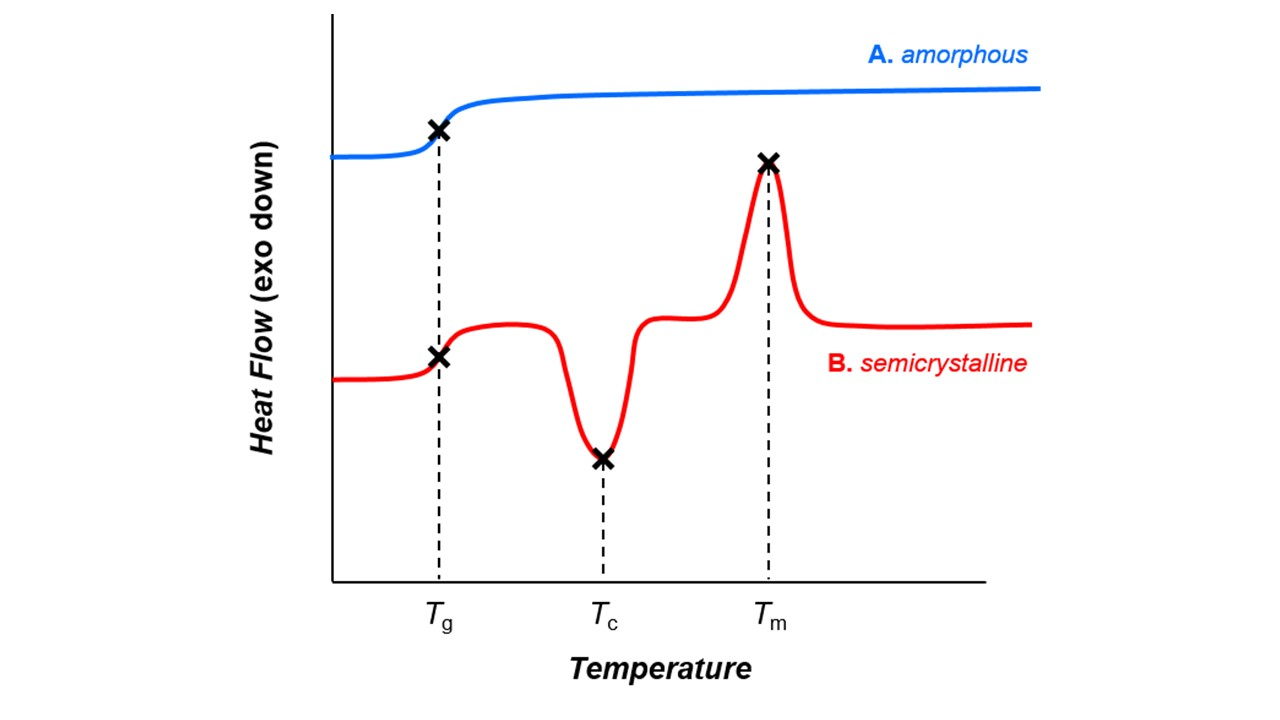

Typical Differential Scanning Calorimeter (DSC) heat flow for an amorphous and a semi-crystalline polymer (exothermic). With the help of DSC it is possible to determine thermal transitions of polymers in a range of temperatures between –180 and +600 °C.


### Glass transition temperature Dataset

The Glass transition temperature dataset used in this study was collected from the PolyInfo dataset (https://polymer.nims.go.jp/). Polymer Database "PoLyInfo" systematically provides various data required for polymeric material design. The main data source is academic literature on polymers. To access the PolyInfo dataset, the domain name of your email address must be registered in our management list.

The reason for using Tg as an example is twofold: first, this property is extremely important for polymer materials, and second, there are many samples available to train our network. This makes training the network less challenging, making it an excellent starting point for learning the integration of ML and polymer informatics.

## Data Inspection

Before getting started, let's first get to know the dataset we'll be working with a little. We'll be taking a look at what information is contained in each column, and how we can use that information to set ourselves up for success later when we start building our machine learning models.

### Importing the Dataset

Through out this lab, you will see many objects in the code named as _df, which stands for dataframe, the primary data structure from the pandas package. It is similar to a spreadsheet or a table.

We won't discuss dataframe operations in detail in this lab. However, external resources are available for you to familiarize yourself with dataframes such as this introduction and the pandas documentation.

In [ ]:
# Read in the Tg data
Tg_df = pd.read_csv(os.path.join(path,"Tg.csv"))

In [ ]:
# View the dataset (dataframe)
Tg_df

,Smiles,Tg(C)
0,*C*,-63.48
1,*C(C*)C,-2.73
2,*C(C*)CC,-22.54
3,*C(C*)CCC,-32.29
4,*C(C*)C(C)C,10.97
...,...,...
6901,*C1C(C(C(C1)(O)C(F)(F)F)(F)F)(C(C*)(F)F)F,152.00
6902,*C1C(CC(C1)CC(O)(C(F)(F)F)C(F)(F)F)(C(C*)(F)F)F,98.00
6903,*C1C(CC(C1)C(O)(C(F)(F)F)C(F)(F)F)(C(C*)(F)F)F,118.00
6904,*c1cc2C3(CCC(CC3)(C3=NC(CO3)c3ccccc3)C3=NC(CO3...,161.00


Text(0, 0.5, 'Count')

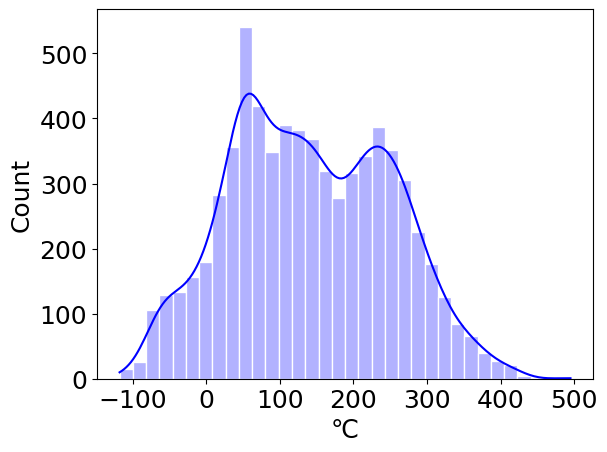

In [ ]:
# View the distribution of dataset labels

kwargs = dict(hist_kws={'alpha':.3, 'edgecolor':'white'})
#plt.figure(figsize=(4,4), dpi= 600)
sns.histplot(Tg_df['Tg(C)'].dropna(), kde=True, color = 'blue', alpha = 0.3, edgecolor='white')

#plt.xlim(-200,500)
#plt.legend()
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel("℃",fontsize=18)
plt.ylabel("Count",fontsize=18)

*C*


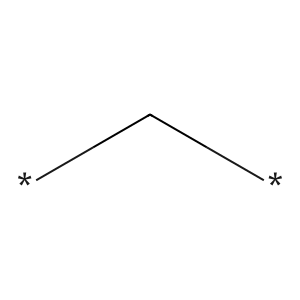

In [ ]:
# View molecular structures in the dataset
smiles = Tg_df['Smiles'][0]
print(smiles)
molecule = Chem.MolFromSmiles(smiles)
Draw.MolToImage(molecule)

### Feature Engineering

The goal of feature engineering is to identify structural features that strongly correlate with the properties of the polymer. Feature engineering is the process of using domain knowledge to select, modify, or create new features from raw data—specifically, polymer structure representation—to increase the predictive power of machine learning algorithms.

#### Morgan fingerprint with frequency

Morgan fingerprint with frequency not only identifies the presence of specific molecular features within the fingerprint but also encodes the frequency of these features, thereby enhancing the representation of polymer structures.

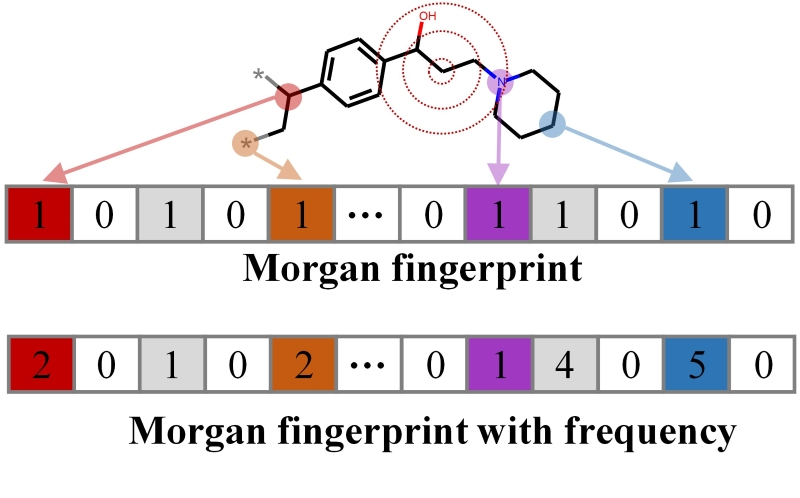

In [ ]:
# Count all the substructure information

# Convert SMILES strings in 'Tg_df.Smiles' to RDKit molecule objects
molecules = Tg_df.Smiles.apply(Chem.MolFromSmiles)

# Generate Morgan fingerprints for each molecule with a radius of 3
fp = molecules.apply(lambda m: AllChem.GetMorganFingerprint(m, radius=3))

# Get the non-zero elements from the fingerprints (i.e., the bits that are set)
fp_n = fp.apply(lambda m: m.GetNonzeroElements())

# Initialize an empty list to store the hash codes (bit identifiers)
HashCode = []
for i in fp_n:
    for j in i.keys():
        HashCode.append(j)

# Get unique hash codes and convert them into a list
unique_set = set(HashCode)
unique_list = list(unique_set)

# Create a DataFrame to map unique hash codes to their indices
Corr_df = pd.DataFrame(unique_list).reset_index()

# Initialize an empty list to store the fingerprint vectors
MY_finger = []
for polymer in fp_n:
    my_finger = [0] * len(unique_list)
    for key in polymer.keys():
        index = Corr_df[Corr_df[0] == key]['index'].values[0]
        my_finger[index] = polymer[key]
    MY_finger.append(my_finger)

# Convert the list of fingerprint vectors into a DataFrame
MFF = pd.DataFrame(MY_finger)
MFF

,0,1,2,3,4,5,6,7,8,9,...,26281,26282,26283,26284,26285,26286,26287,26288,26289,26290
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# filter input into the most popular X substructures

# Count the number of zeros in each column of the DataFrame
Zero_Sum = (MFF == 0).astype(int).sum()

# Set a threshold for the number of zeros in a column
NumberOfZero =6870

# Print the number of columns with fewer zeros than the threshold
print(len(Zero_Sum[Zero_Sum < NumberOfZero]))

1210


In [ ]:
# Generate the Morgan fingerprint with frequency after determining the number of dimensions

Columns = Zero_Sum[Zero_Sum < NumberOfZero].index
Substructure_list = list(polymer.keys())
MFF = MFF[Columns]
MFF

,15,36,127,142,169,205,210,240,243,259,...,26115,26117,26127,26137,26154,26162,26199,26215,26231,26286
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


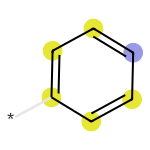

In [ ]:
# View the substructure represented by each bit of the Morgan Fingerprint

# Select a specific bit
bit = 399

for i in range(6000):
    mol = Chem.MolFromSmiles(Tg_df.loc[i,'Smiles'])
    # Get the bit information of the Morgan fingerprint
    bi = {}
    fp = rdMolDescriptors.GetMorganFingerprint(mol, radius=3, bitInfo=bi)
    fp_n = fp.GetNonzeroElements()
    Code = (Corr_df[Corr_df['index'] == bit][0].values[0])
    if Code in fp_n.keys():
        img = Draw.DrawMorganBit(mol,Code,bi)

        break
img

The central atom of the substructures is highlighted in purple, aromatic atoms are highlighted in yellow, other atoms and bonds are highlighted in gray.

*C(C*)Cc1ccccc1


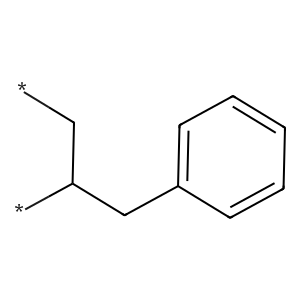

In [ ]:
# View molecular structures in the dataset
smiles = Tg_df['Smiles'][21]
print(smiles)
molecule = Chem.MolFromSmiles(smiles)
Draw.MolToImage(molecule)

In [ ]:
#Save the generated information for future reproduction of the same Morgan fingerprint with frequency.

pickle_out = open("/content/drive/My Drive/SPE_day3+4/Corr_All.pickle","wb")
pickle.dump(Corr_df, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/My Drive/SPE_day3+4/unique_list_All.pickle","wb")
pickle.dump(unique_list, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/My Drive/SPE_day3+4/polymer.keys_All.pickle","wb")
pickle.dump(Substructure_list, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/My Drive/SPE_day3+4/Columns_All.pickle","wb")
pickle.dump(Columns, pickle_out)
pickle_out.close()

# Using supervised learning to predict polymer peoperties

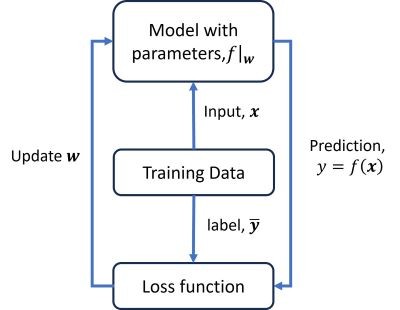

When using ML models to predict polymer properties, supervised learning is generally employed. In supervised learning, models are trained using pre-collected data. This training process relies on labeled data, where each data point is associated with a corresponding outcome. By training on this labeled dataset, a supervised ML model learns to map input data to expected outputs.

### Setpu Machine Learning Model

#### Fitting and Evaluating a Feedforward Neural Network

A feedforward neural network (FNN) is one of the two broad types of artificial neural network, characterized by direction of the flow of information between its layers. Its flow is uni-directional, meaning that the information in the model flows in only one direction—forward—from the input nodes, through the hidden nodes (if any) and to the output nodes, without any cycles or loops. Modern feedforward networks are trained using the backpropagation method.

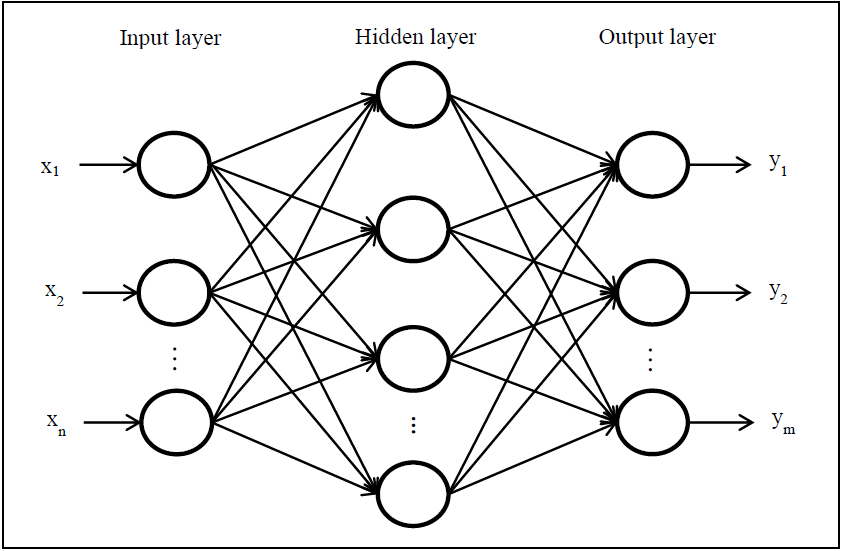

In [ ]:
n_1=int(256)
n_2=int(64)
n_3=int(2048)
n_4=int(512)

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import plot_model
from keras.layers import Concatenate
from numpy.random import seed
import tensorflow

In [ ]:
X = MFF
y = Tg_df['Tg(C)']

In [ ]:
# Generate train/test split by reserving 10% of data as test set

test_fraction = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_fraction, shuffle=True, random_state = 11)

A1 = Input(shape=([1210]),name='A1')
A2 = Dense(n_1, activation='relu',name='A2')(A1)
A3 = Dense(n_2, activation='relu',name='A3')(A2)
A4 = Dense(n_3, activation='relu',name='A4')(A3)
A5 = Dense(n_4, activation='relu',name='A5')(A4)
A6 = Dense(1, name='A6')(A5)

model = Model(inputs=[A1],outputs=[A6])
model.compile(loss = "mse", optimizer = 'adam')

seed(1)
tensorflow.random.set_seed(1*7+333)

history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data = ((X_test), y_test), verbose=0)

In [ ]:
y_pred_train = model.predict((X_train))
print("Train set R^2: ", r2_score(y_train, y_pred_train))

y_pred_test = model.predict((X_test))
print("Test set R^2: ", r2_score(y_test, y_pred_test))

In [ ]:
plt.figure(figsize=(5,5))

ax=plt.subplot(1, 1, 1)
plt.plot(y_train, y_pred_train, 'b.')
plt.plot(y_test, y_pred_test, 'g.')

plt.xlabel("Experiment (℃)", fontsize=12)
plt.ylabel("Prediction (℃)", fontsize=12)
x0, x1 = min(y_train), max(y_train)
length = 750
x_start, x_end = x0*0.9, x1*1.1
plt.xticks(fontsize=12, fontweight='normal')
plt.yticks(fontsize=12, fontweight='normal')
plt.title("Tg", fontsize=12, fontweight='normal')
plt.gca().set_aspect("equal", adjustable="box")
# the unit line
plt.plot(np.arange(x_start, x_end, (x_end - x_start) / 10),
np.arange(x_start, x_end, (x_end - x_start) / 10), 'r-')
plt.text(x_start + (x_end - x_start)*0, x_end - (x_end - x_start)*0.12, "Train $R^2={:.2f}$".format(r2_score(y_train, y_pred_train)),{'color':"b"}, fontsize=14)
plt.text(x_start + (x_end - x_start)*0.42, x_end - (x_end - x_start)*0.12, "Test  $R^2 ={:.2f}$".format(r2_score(y_test, y_pred_test)),{'color':"g"}, fontsize=14)

# Unsupervised Learning

Unsupervised learning is a ML process where models infer underlying hidden patterns from data without predefined output labels. This method doesn't require labeled training data, which saves time that would otherwise be spent on manual classification. Additionally, obtaining unlabeled data is typically faster and easier, reducing the risk of human error and bias that might occur during manual labeling processes.

Today, we will introduce three unsupervised learning techniques: T-Distributed Stochastic Neighbor Embedding (t-SNE), K-means clustering, and SHAP (SHapley Additive exPlanations) analysis.

#### T-Distributed Stochastic Neighbor Embedding (t-SNE)

T-SNE, an unsupervised learning technique, is particularly effective in the visualization of chemical spaces in polymer informatics. This method is adept at reducing the high-dimensional data (often encountered in polymer datasets) into a two or three-dimensional space, making it easier to discern patterns and relationships. In the context of polymers, t-SNE can be used to map complex molecular structures or property datasets into a visual format.

This visualization aids in understanding the distribution and clustering of polymers based on their properties or structural similarities. Such insights are invaluable for identifying trends, anomalies, or groupings that might not be immediately apparent in the raw, high-dimensional data. t-SNE's ability to reveal the underlying structure in data makes it a powerful tool for exploratory analysis in polymer researchinformatics, facilitating a deeper comprehension of the chemical diversity and the potential relationships between different polymer typesclasses.



Before we begin using T-SNE, we will first generate different classes of hypothetical polymer structures based on well-defined polymerization routes and small compounds.

In [ ]:
!pip install smipoly

In [ ]:
import numpy as np
import pandas as pd
from smipoly.smip import monc, polg

In [ ]:
#Read source file
DF = pd.read_csv(path+"202207_smip_monset.csv") #sample monomer list on GitHub
DF

,comID,MolecularFormula,MolecularWeight,SMILES,IUPACName
0,CID174,C2H6O2,62.07,C(CO)O,"ethane-1,2-diol"
1,CID196,C6H10O4,146.14,C(CCC(=O)O)CC(=O)O,hexanedioic acid
2,CID262,C4H10O2,90.12,CC(C(C)O)O,"butane-2,3-diol"
3,CID273,C5H14N2,102.18,C(CCN)CCN,"pentane-1,5-diamine"
4,CID371,C4H2O4,114.06,C(#CC(=O)O)C(=O)O,but-2-ynedioic acid
...,...,...,...,...,...
1078,CID91972128,C22H10N4,330.30,C=CC1=CC2=C(C=C1)C(=C(C#N)C#N)C3=CC=CC=C3C2=C(...,2-[10-(dicyanomethylidene)-3-ethenylanthracen-...
1079,CID102529357,C14H30O5Si,306.47,CO[Si](CCCCCCCCOCC1CO1)(OC)OC,trimethoxy-[8-(oxiran-2-ylmethoxy)octyl]silane
1080,CID125370311,C15H24O2Si,264.43,C=CC[Si](CCCOC(=O)C=C)(CC=C)CC=C,3-tris(prop-2-enyl)silylpropyl prop-2-enoate
1081,CID125401955,C16H26O2Si,278.46,CC(=C)C(=O)OCCC[Si](CC=C)(CC=C)CC=C,3-tris(prop-2-enyl)silylpropyl 2-methylprop-2-...


In [ ]:
# Classify monomers
DF02 = monc.moncls(df=DF, smiColn='SMILES', dsp_rsl=True)
#Generate polymers
#read source DataFrame
tpstart = time.perf_counter()
DF03 = polg.biplym(df=DF02, targ=['polyether', ], Pmode='a', dsp_rsl=True)
tpend = time.perf_counter()
tm = tpend-tpstart
print("CPU time: ", tm)
print(f"DF03 memory usage: {DF03.memory_usage(deep=True).sum() / 1024 ** 2} MB")
#extract linear polymer
DF04 = DF03[DF03['polym'].apply(lambda x:x.count('*')==2)]
DF05 = DF04.drop_duplicates(subset=['polym'])
polyether_df = DF05[['mon1', 'mon2', 'polym']].rename(columns={'polym': 'Smiles'})
polyether_df

run at advanced mode
number of polymerization reactions =  739
number of generated polymers =  868
CPU time:  52.085801318999984
DF03 memory usage: 0.34459495544433594 MB


,mon1,mon2,Smiles
2,C1CO1,,*CCO*
3,CC1CO1,,*OCC(*)C
4,CC1CO1,,*CC(C)O*
5,c1ccc(C2CO2)cc1,,*OCC(*)c1ccccc1
6,c1ccc(C2CO2)cc1,,*CC(O*)c1ccccc1
...,...,...,...
861,O=C(c1ccc(F)cc1)c1ccc(F)cc1,OCCC1CCC(O)CC1,*OC1CCC(CCOc2ccc(C(=O)c3ccc(*)cc3)cc2)CC1
862,O=C(c1ccc(F)cc1)c1ccc(F)cc1,OCCC1CCC(O)CC1,*OCCC1CCC(Oc2ccc(C(=O)c3ccc(*)cc3)cc2)CC1
863,O=C(c1ccc(F)cc1)c1ccc(F)cc1,Oc1ccc(-c2ccc(O)c(Br)c2)cc1Br,*Oc1ccc(-c2ccc(Oc3ccc(C(=O)c4ccc(*)cc4)cc3)c(B...
864,O=C(c1ccc(F)cc1)c1ccc(F)cc1,Oc1ccc(C2(c3ccc(O)c(C4CCCCC4)c3)CCCCC2)cc1C1CC...,*Oc1ccc(C2(c3ccc(Oc4ccc(C(=O)c5ccc(*)cc5)cc4)c...


Defined polymer class:

  -polyolefin, polycyclic olefin and their binary copolymers

  -polyester (from lactone, hydroxy carboxylic acid, dicarboxylic acid + diol, diol + CO and cyclic carboxylic acid anhydride + epoxide)

  -polyether (from epoxide, hindered phenol, bis(halo aryl)sulfone + diol and bis(fluoro aryl)ketone + diol)

  -polyamide (from lactam, amino acid and dicarboxylic acid + diamine)

  -polyimide (bis(cyclic carboxylic acid anhydride + primary diamine)

  -polyurethane (diisocyanate + diol)

  -polyoxazolidone (diepoxide + diisocyanate)

In [ ]:
#Generate polymers
#read source DataFrame
tpstart = time.perf_counter()
DF03 = polg.biplym(df=DF02, targ=['polyimide', ], Pmode='a', dsp_rsl=True)
tpend = time.perf_counter()
tm = tpend-tpstart
print("CPU time: ", tm)
print(f"DF03 memory usage: {DF03.memory_usage(deep=True).sum() / 1024 ** 2} MB")
#extract linear polymer
DF04 = DF03[DF03['polym'].apply(lambda x:x.count('*')==2)]
DF05 = DF04.drop_duplicates(subset=['polym'])
polyimide_df = DF05[['mon1', 'mon2', 'polym']].rename(columns={'polym': 'Smiles'})
polyimide_df

run at advanced mode
number of polymerization reactions =  4200
number of generated polymers =  5577
CPU time:  114.69959878999998
DF03 memory usage: 2.339837074279785 MB


,mon1,mon2,Smiles
0,O=C1OC(=O)c2ccc3c4c(ccc1c24)C(=O)OC3=O,NCCCCCN,*CCCCCN1C(=O)c2ccc3c4c(ccc(c24)C1=O)C(=O)N(*)C3=O
1,O=C1OC(=O)c2ccc3c4c(ccc1c24)C(=O)OC3=O,NCCCN,*CCCN1C(=O)c2ccc3c4c(ccc(c24)C1=O)C(=O)N(*)C3=O
2,O=C1OC(=O)c2ccc3c4c(ccc1c24)C(=O)OC3=O,NCCCCN,*CCCCN1C(=O)c2ccc3c4c(ccc(c24)C1=O)C(=O)N(*)C3=O
3,O=C1OC(=O)c2ccc3c4c(ccc1c24)C(=O)OC3=O,NCCCCCCCCCCN,*CCCCCCCCCCN1C(=O)c2ccc3c4c(ccc(c24)C1=O)C(=O)...
4,O=C1OC(=O)c2ccc3c4c(ccc1c24)C(=O)OC3=O,Nc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1,*c1ccc(S(=O)(=O)c2ccc(N3C(=O)c4ccc5c6c(ccc(c46...
...,...,...,...
5570,O=C1OC(=O)c2cc(C#Cc3ccc4c(c3)C(=O)OC4=O)ccc21,Cc1cc(C2(c3ccc(N)c(C)c3)c3ccccc3-c3ccccc32)ccc1N,*c1ccc(C2(c3ccc(N4C(=O)c5ccc(C#Cc6ccc7c(c6)C(=...
5571,O=C1OC(=O)c2cc(C#Cc3ccc4c(c3)C(=O)OC4=O)ccc21,Nc1ccc(C2(c3ccc(N)c(Cl)c3)c3ccccc3-c3ccccc32)c...,*c1ccc(C2(c3ccc(N4C(=O)c5ccc(C#Cc6ccc7c(c6)C(=...
5573,O=C1OC(=O)c2cc(C#Cc3ccc4c(c3)C(=O)OC4=O)ccc21,Nc1ccc(C2(c3ccc(N)c(F)c3)c3ccccc3-c3ccccc32)cc1F,*c1ccc(C2(c3ccc(N4C(=O)c5ccc(C#Cc6ccc7c(c6)C(=...
5574,O=C1OC(=O)c2cc(C#Cc3ccc4c(c3)C(=O)OC4=O)ccc21,Nc1ccc(OC(=O)c2ccc(C(=O)Oc3ccc(N)cc3)cc2)cc1,*c1ccc(OC(=O)c2ccc(C(=O)Oc3ccc(N4C(=O)c5ccc(C#...


We can also use RDKit to directly generate some hypothetical polymer structures based on small molecules. Here, we will demonstrate how to generate polybenzimidazole (PBI), a polymer that is not included in the SMIPoly support list.

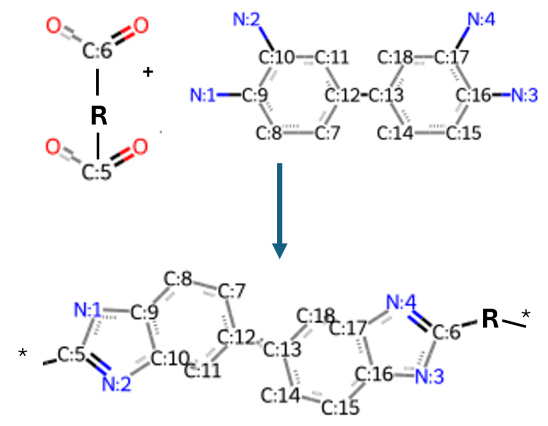

Helper Functions: Two helper functions are defined:

`get_neiid_bysymbol()`: Retrieves the index of a neighboring atom for a specified element symbol in a molecule.

`get_id_bysymbol()`: Finds the index of an atom based on its element symbol.

`combine2frags()`: Combines two molecular fragments by connecting specified marker atoms, removing the marker atoms after bonding, and generating a final SMILES string representing the combined molecule.

In [ ]:
# Function to get the index of a neighboring atom of a specified element symbol
def get_neiid_bysymbol(mol,marker):
    try:
        for atom in mol.GetAtoms():
            # Check if the current atom's symbol matches the marker
            if atom.GetSymbol()==marker:
                neighbors=atom.GetNeighbors()
                if len(neighbors)>1:
                    print ('Cannot process more than one neighbor, will only return one of them')
                atom_nb=neighbors[0]
                return atom_nb.GetIdx() # Return the index of the neighbor atom
    except Exception as e:
        print (e)
        return None

# Function to get the index of an atom by its element symbol
def get_id_bysymbol(mol,marker):
    for atom in mol.GetAtoms():
        # Check if the current atom's symbol matches the marker
        if atom.GetSymbol()==marker:
            return atom.GetIdx()  # Return the index of the atom

# Function to combine two molecular fragments by connecting specific marker atoms
def combine2frags(mol_a,mol_b,maker_b='Cs',maker_a='Rb'):
    # Merge the two molecules
    merged_mol = Chem.CombineMols(mol_a,mol_b)
    # Get the binding positions for the marker atoms
    bind_pos_a=get_neiid_bysymbol(merged_mol,maker_a)
    bind_pos_b=get_neiid_bysymbol(merged_mol,maker_b)
    ed_merged_mol= Chem.EditableMol(merged_mol)
    # Add a single bond between the two binding positions
    ed_merged_mol.AddBond(bind_pos_a,bind_pos_b,order=Chem.rdchem.BondType.SINGLE)
    # Remove marker atom 'maker_a'
    marker_a_idx=get_id_bysymbol(merged_mol,maker_a)
    ed_merged_mol.RemoveAtom(marker_a_idx)
    temp_mol = ed_merged_mol.GetMol()
    # Remove marker atom 'maker_b'
    marker_b_idx=get_id_bysymbol(temp_mol,maker_b)
    ed_merged_mol=Chem.EditableMol(temp_mol)
    ed_merged_mol.RemoveAtom(marker_b_idx)
    # Generate the final molecule and convert it to SMILES format
    final_mol = ed_merged_mol.GetMol()
    final_smiles = Chem.MolToSmiles(final_mol)
    return final_smiles  # Return the combined molecule in SMILES format

The code iterates over each SMILES string in the input dataset, performs modifications by replacing specific substructures with placeholder or marker atoms, and then combines the modified molecule with a predefined molecular fragment using the `combine2frags()` function.

In [ ]:
# Import data from CSV file containing molecular information
PBI_df = pd.read_csv(path+'diCOOH.csv')

new_smiles_list = []

# Loop through each SMILES string in the dataframe
for smiles in PBI_df['Smiles']:

    m = Chem.MolFromSmiles(smiles)
    # Define patterns for modification
    patt = Chem.MolFromSmarts('C(=O)O') # Carboxylic acid group pattern
    repl1 = Chem.MolFromSmiles('[*]') # Placeholder atom for first replacement
    repl2 = Chem.MolFromSmiles('[Cs]') # Cesium atom for second replacement
    # Replace the carboxylic acid group with a placeholder atom
    rms = AllChem.ReplaceSubstructs(m, patt, repl1, replacementConnectionPoint=0)
    rms[0]
    # Replace the carboxylic acid group with a Cesium atom
    rms = AllChem.ReplaceSubstructs(rms[0], patt, repl2, replacementConnectionPoint=0)
    modified_smiles = Chem.MolToSmiles(rms[0])
    modified_smiles
    # Define two molecular fragments to be combined
    mol1=Chem.MolFromSmiles('C1=CC4=C(C=C1C2=CC3=C(C=C2)N=C([N]3)[Rb])N=C([N]4)[*]')
    mol2=Chem.MolFromSmiles(modified_smiles)
    # Combine the two fragments and create a new SMILES string
    new_smile = combine2frags(mol1,mol2)
    new_smile
    # Add the new SMILES string to the list
    new_smiles_list.append(new_smile)

# Add a new column 'mon1' with a predefined SMILES string
PBI_df['mon1'] = 'C1=CC(=C(C=C1C2=CC(=C(C=C2)N)N)N)N'
# Rename the 'Smiles' column to 'mon2'
PBI_df.rename(columns={'Smiles': 'mon2'}, inplace=True)
# Update the 'Smiles' column with the new SMILES strings
PBI_df['Smiles'] = new_smiles_list
PBI_df  # Display the updated dataframe

,mon2,mon1,Smiles
0,CC12CC1C(CC2C(O)=O)C(O)=O,C1=CC(=C(C=C1C2=CC(=C(C=C2)N)N)N)N,*C1=Nc2cc(-c3ccc4c(c3)[N]C(C3CC(*)C5(C)CC35)=N...
1,CC12CC1CC(C2C(O)=O)C(O)=O,C1=CC(=C(C=C1C2=CC(=C(C=C2)N)N)N)N,*C1=Nc2cc(-c3ccc4c(c3)[N]C(C3CC5CC5(C)C3*)=N4)...
2,CC12CC(C1)C(C2C(O)=O)C(O)=O,C1=CC(=C(C=C1C2=CC(=C(C=C2)N)N)N)N,*C1=Nc2cc(-c3ccc4c(c3)[N]C(C3C5CC(C)(C5)C3*)=N...
3,CC12C=CC(C1C2C(O)=O)C(O)=O,C1=CC(=C(C=C1C2=CC(=C(C=C2)N)N)N)N,*C1=Nc2cc(-c3ccc4c(c3)[N]C(C3C=CC5(C)C(*)C35)=...
4,CC12CC1C(C(C2)C(O)=O)C(O)=O,C1=CC(=C(C=C1C2=CC(=C(C=C2)N)N)N)N,*C1=Nc2cc(-c3ccc4c(c3)[N]C(C3C(*)CC5(C)CC35)=N...
...,...,...,...
1285,OC(=O)CCC1=CC(CC1)C(O)=O,C1=CC(=C(C=C1C2=CC(=C(C=C2)N)N)N)N,*CCC1=CC(C2=Nc3ccc(-c4ccc5c(c4)N=C(*)[N]5)cc3[...
1286,OC(=O)CCC1=CCC(C1)C(O)=O,C1=CC(=C(C=C1C2=CC(=C(C=C2)N)N)N)N,*CCC1=CCC(C2=Nc3ccc(-c4ccc5c(c4)N=C(*)[N]5)cc3...
1287,OC(=O)CCC1=CCCC1C(O)=O,C1=CC(=C(C=C1C2=CC(=C(C=C2)N)N)N)N,*CCC1=CCCC1C1=Nc2ccc(-c3ccc4c(c3)N=C(*)[N]4)cc...
1288,OC(=O)CCC1C=CCC1C(O)=O,C1=CC(=C(C=C1C2=CC(=C(C=C2)N)N)N)N,*CCC1C=CCC1C1=Nc2ccc(-c3ccc4c(c3)N=C(*)[N]4)cc...


Here, we will use the t-SNE technique to visualize the chemical space distribution of the new hypothetical polymers as well as real polymers collected from PolyInfo.

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
# Combine the 'Smiles' columns from multiple DataFrames (polyether_df, polyimide_df, PBI_df, and Tg_df) into a single dataset
combined_data = pd.concat([polyether_df['Smiles'], polyimide_df['Smiles'], PBI_df['Smiles'], Tg_df['Smiles']], ignore_index=True)

# Convert the combined SMILES strings to molecular fingerprint representations using Morgan Fingerprints (radius 3, 2048 bits)
# Drop any NaN values resulting from invalid SMILES strings

fn = pd.DataFrame(combined_data)['Smiles'].apply(Chem.MolFromSmiles).dropna().apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=3, nBits=2048))

# Convert the list of fingerprints to a NumPy array for further analysis
X_fingerprint_All_Polyinfo = np.array(fn.tolist())

# Start a timer to measure the execution time of t-SNE
time_start = time.time()

# Initialize t-SNE (t-Distributed Stochastic Neighbor Embedding) for dimensionality reduction
# The t-SNE is set to reduce the data to 2 components with a perplexity of 40 and 500 iterations
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500,random_state=100)

# Apply t-SNE to the molecular fingerprints to reduce dimensionality for visualization or analysis
tsne_results = tsne.fit_transform(X_fingerprint_All_Polyinfo)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 13168 samples in 0.013s...
[t-SNE] Computed neighbors for 13168 samples in 35.941s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13168
[t-SNE] Computed conditional probabilities for sample 2000 / 13168
[t-SNE] Computed conditional probabilities for sample 3000 / 13168
[t-SNE] Computed conditional probabilities for sample 4000 / 13168
[t-SNE] Computed conditional probabilities for sample 5000 / 13168
[t-SNE] Computed conditional probabilities for sample 6000 / 13168
[t-SNE] Computed conditional probabilities for sample 7000 / 13168
[t-SNE] Computed conditional probabilities for sample 8000 / 13168
[t-SNE] Computed conditional probabilities for sample 9000 / 13168
[t-SNE] Computed conditional probabilities for sample 10000 / 13168
[t-SNE] Computed conditional probabilities for sample 11000 / 13168
[t-SNE] Computed conditional probabilities for sample 12000 / 13168
[t-SNE] Computed conditional probabilities for s

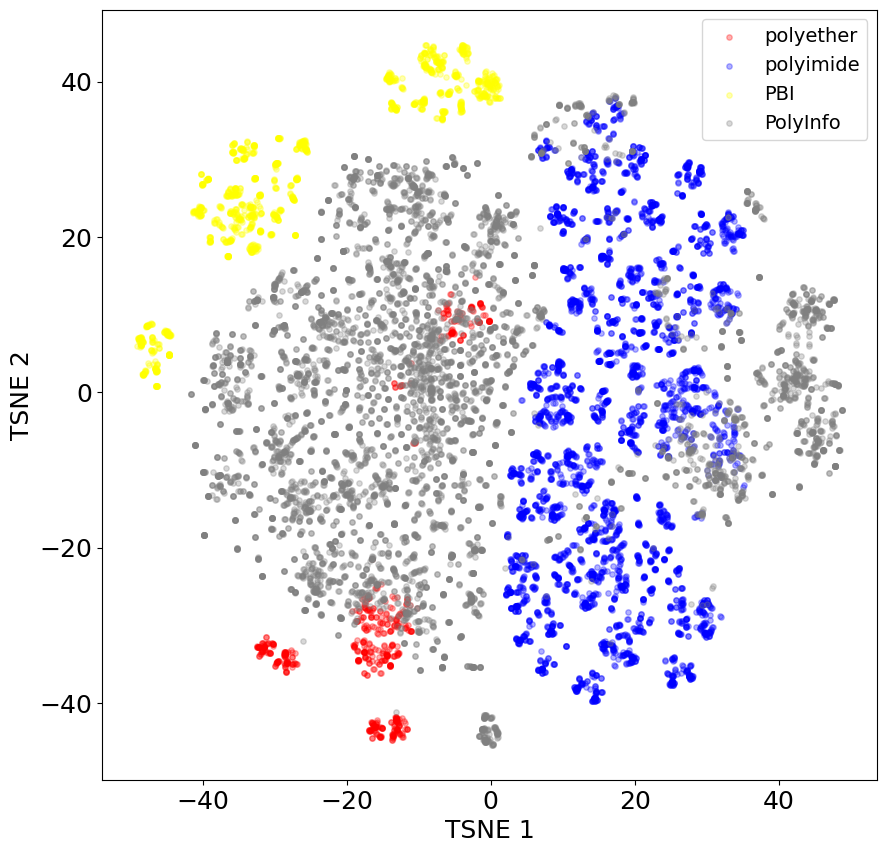

In [ ]:
fig = plt.figure(figsize=(10, 10))

# Plot the t-SNE results for the polyether data points in red
plt.scatter(tsne_results[0:polyether_df.shape[0], 0], tsne_results[0:polyether_df.shape[0], 1], s = 15, c='red', alpha=0.3, label='polyether')

# Plot the t-SNE results for the polyimide data points in blue
plt.scatter(tsne_results[polyether_df.shape[0]:polyether_df.shape[0]+polyimide_df.shape[0], 0], tsne_results[polyether_df.shape[0]:polyether_df.shape[0]+polyimide_df.shape[0], 1], s = 15, c='blue', alpha=0.3, label='polyimide')

# Plot the t-SNE results for the PBI data points in yellow
plt.scatter(tsne_results[polyether_df.shape[0]+polyimide_df.shape[0]:polyether_df.shape[0]+polyimide_df.shape[0]+PBI_df.shape[0], 0],
            tsne_results[polyether_df.shape[0]+polyimide_df.shape[0]:polyether_df.shape[0]+polyimide_df.shape[0]+PBI_df.shape[0], 1], s = 15, c='yellow', alpha=0.3, label='PBI')

# Plot the t-SNE results for the remaining PolyInfo data points in gray
plt.scatter(tsne_results[polyether_df.shape[0]+polyimide_df.shape[0]+PBI_df.shape[0]:, 0],
            tsne_results[polyether_df.shape[0]+polyimide_df.shape[0]+PBI_df.shape[0]:, 1], s = 15, c='gray', alpha=0.3, label='PolyInfo')

# Set the x and y axis labels with specified font size
plt.xlabel("TSNE 1", fontsize=18)
plt.ylabel("TSNE 2", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# Add the legend to the plot
plt.legend(fontsize=14, loc='upper right')
plt.show()

As shown in the t-SNE plot, the test set is not perfectly evenly distributed across the entire chemical space, which is why cross-validation provides a better evaluation of the model structure.

#### K-means Clustering

K-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

In [ ]:
# Import the KMeans class from sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:

# Initialize the KMeans model
# Specify the number of clusters (e.g., 4 clusters)
n_clusters = 300
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the KMeans model to the molecular fingerprint data
kmeans.fit(X_fingerprint_All_Polyinfo)

# Retrieve the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: ylabel='Count'>

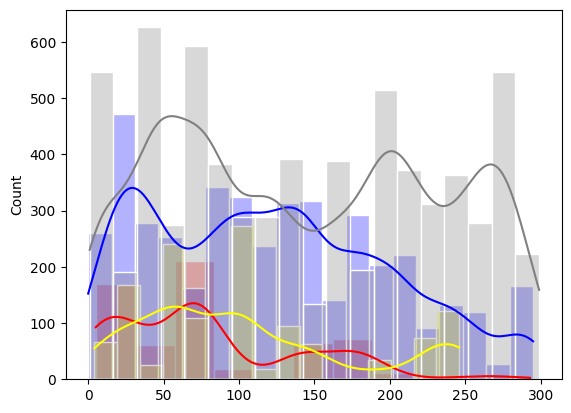

In [ ]:
# Define the index ranges for each dataset
range_polyether = range(0, polyether_df.shape[0])
range_polyimide = range(polyether_df.shape[0], polyether_df.shape[0] + polyimide_df.shape[0])
range_PBI = range(polyether_df.shape[0] + polyimide_df.shape[0], polyether_df.shape[0] + polyimide_df.shape[0] + PBI_df.shape[0])
range_polyinfo = range(polyether_df.shape[0] + polyimide_df.shape[0] + PBI_df.shape[0], len(cluster_labels))

# Visualize the clusters
kwargs = dict(hist_kws={'alpha':.3, 'edgecolor':'white'})

sns.histplot(cluster_labels[range_polyether], kde=True, color = 'red', alpha = 0.3, edgecolor='white')
sns.histplot(cluster_labels[range_polyimide], kde=True, color = 'blue', alpha = 0.3, edgecolor='white')
sns.histplot(cluster_labels[range_PBI], kde=True, color = 'yellow', alpha = 0.3, edgecolor='white')
sns.histplot(cluster_labels[range_polyinfo], kde=True, color = 'gray', alpha = 0.3, edgecolor='white')

#### SHAP (SHapley Additive exPlanations) analysis

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions (see https://github.com/shap/shap#citations for details).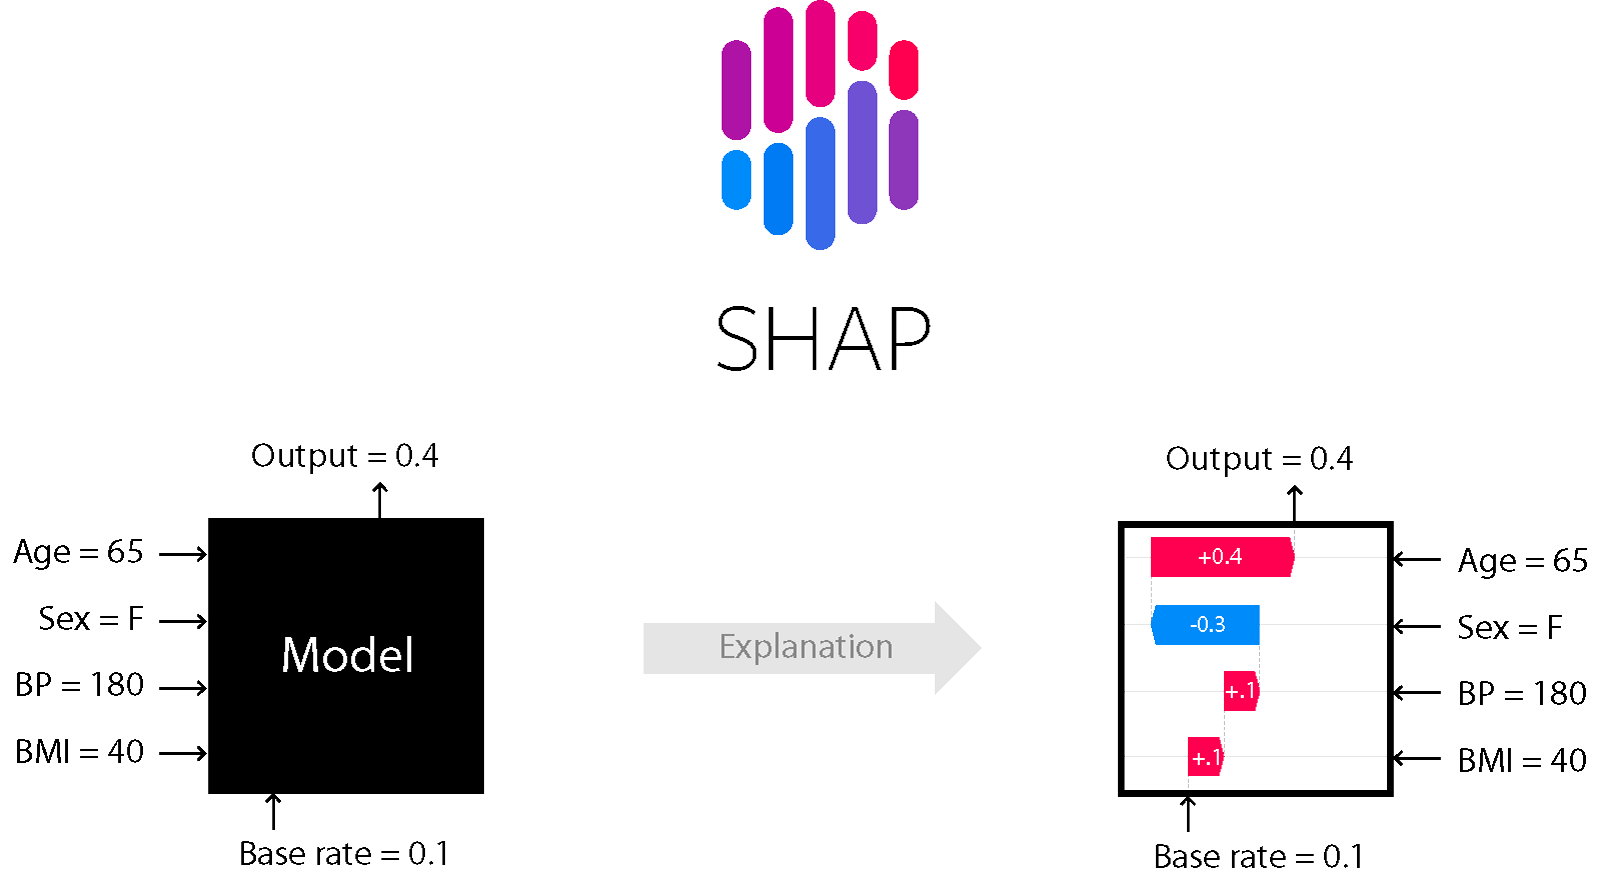

In [ ]:
!pip install shap==0.41.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 7.0 MB/s eta 0:00:00


In [ ]:
import shap
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
import numpy as np
np.bool = np.bool_

In [ ]:
# Randomly sample 400 rows from the DataFrame
MFF_sampled = MFF.sample(n=400, random_state=42)
Tg_df_sampled = Tg_df.loc[MFF_sampled.index]
# Reset the index of the sampled DataFrame and drop the old index
MFF_sampled = MFF_sampled.reset_index(drop=True)
Tg_df_sampled = Tg_df_sampled.reset_index(drop=True)
background = MFF_sampled.values
e = shap.explainers._deep.Deep(model, background)
shap_values = e.shap_values(background)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Here, we record the SHAP information for later PCA analysis.

In [ ]:
col ='Tg(C)'
with open("shap_values_{}.pkl".format(col), "wb") as f:
    pickle.dump(shap_values, f)

with open("shap_values_{}.pkl".format(col), "rb") as f:
    shap_values = pickle.load(f)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


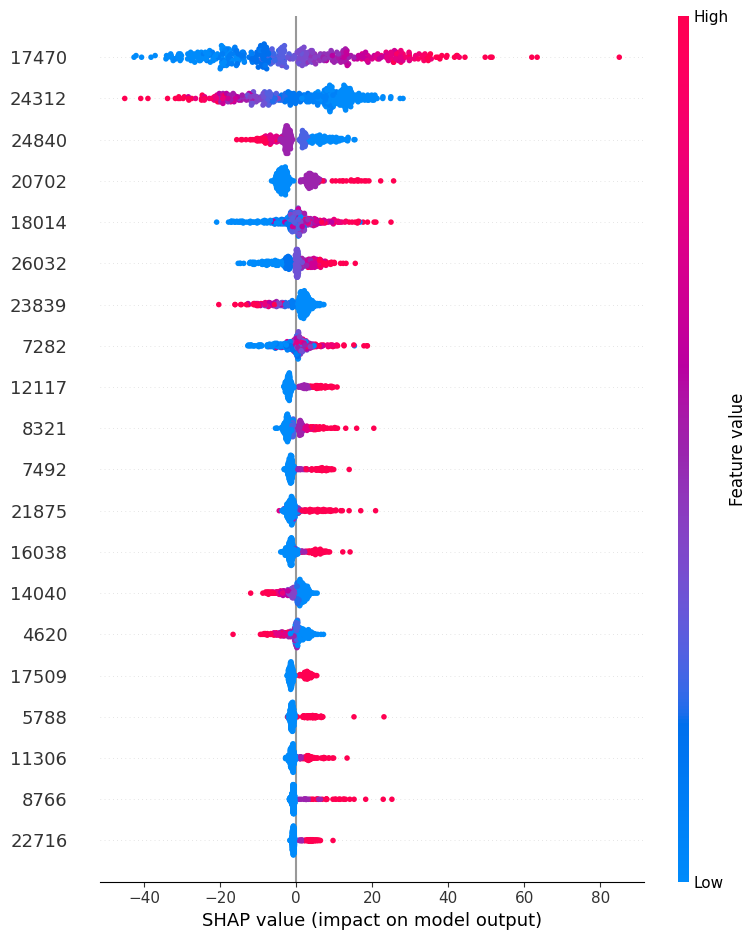

In [ ]:
shap.summary_plot(shap_values[0],MFF_sampled,feature_names=MFF_sampled.columns)

invalid value encountered in divide


Text(0.5, 0, 'SHAP Value (Red = Positive Impact)')

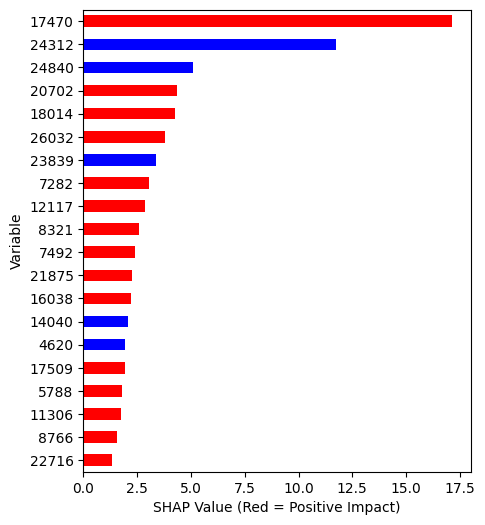

In [ ]:
df_shap = shap_values[0]
df = pd.DataFrame(MFF_sampled)
#import matplotlib as plt
# Make a copy of the input data
shap_v = pd.DataFrame(df_shap)
feature_list = df.columns
shap_v.columns = feature_list
df_v = df.copy().reset_index().drop('index',axis=1)

# Determine the correlation in order to plot with different colors
corr_list = list()
for i in feature_list:
    b = np.corrcoef(shap_v[i],df_v[i])[1][0]
    corr_list.append(b)
corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
# Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
corr_df.columns  = ['Variable','Corr']
corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')

# Plot it
shap_abs = np.abs(shap_v)
k=pd.DataFrame(shap_abs.mean()).reset_index()
k.columns = ['Variable','SHAP_abs']
k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
k2 = k2.sort_values(by='SHAP_abs',ascending = True)

with open("shap_df_{}.pkl".format(col), "wb") as f:
    pickle.dump(k2.iloc[::-1], f)

k2 = k2[-20:]
colorlist = k2['Sign']
ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
ax.set_xlabel("SHAP Value (Red = Positive Impact)")

In [ ]:
def countdown(centric, radius, mol, Highlight_Atom, Highlight_Bond):
#     centric: central atom ID
#     radius:  serch radius
#     mol:     molecules
#     Highlight_Atom: All atoms within radius of a central atom

    if radius < 0:
        return
    else:
        Highlight_Atom.append(centric)
        atom = mol.GetAtomWithIdx(centric)
        for nei in atom.GetNeighbors():
            if radius > 0:
                Highlight_Bond.append(mol.GetBondBetweenAtoms(centric,nei.GetIdx()).GetIdx())
            countdown(nei.GetIdx(), radius - 1, mol, Highlight_Atom, Highlight_Bond)

24312
23839
17470
18014
7282
24840
26032
8321
20702
12117
21875
7492


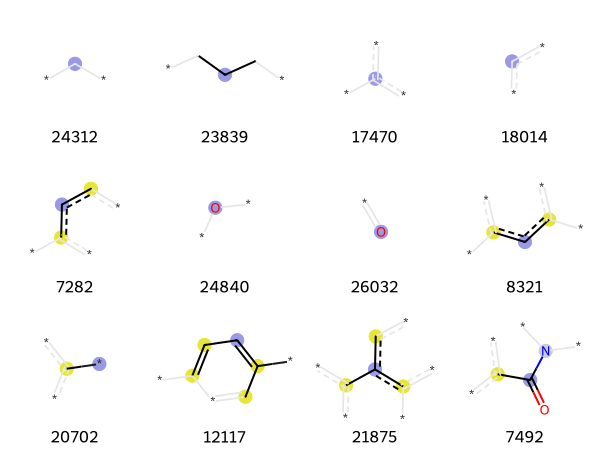

In [ ]:
tpls = []
PlotSub = []
legs = []

for i in range(len(Tg_df[100:])):
    mol = Chem.MolFromSmiles(Tg_df.Smiles.iloc[i])
    bi = {}
    fp = rdMolDescriptors.GetMorganFingerprint(mol, radius=3, bitInfo=bi)
    fp_n = fp.GetNonzeroElements()
    for x in k2.iloc[::-1]['Variable'][:12]:
        if x not in PlotSub:
            Code = (Corr_df[Corr_df['index'] == x][0].values[0])
            if Code in fp_n.keys():
                print(x)
                legs.append(x)
                tpls.append((mol,Code,bi))
                img = Draw.DrawMorganBit(mol,Code,bi)
                PlotSub.append(x)


img = Draw.DrawMorganBits(tpls,molsPerRow=4,legends=[str(x) for x in legs])
img

In [ ]:
explainer = shap.KernelExplainer(model.predict,X.values)

216/216 [==============================] - 1s 5ms/step


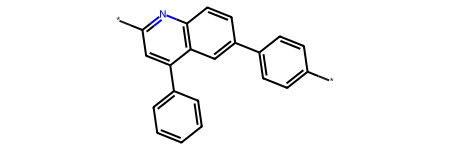

In [ ]:
index_polymer = 66

mol = Chem.MolFromSmiles(Tg_df_sampled.loc[index_polymer,'Smiles'])
mol

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][index_polymer,:],MFF_sampled.values[index_polymer,:],feature_names=list(MFF_sampled.columns))

In [ ]:
# View the substructure represented by each bit of the Morgan Fingerprint

# Select a specific bit
bit = 24312

for i in range(6000):
    mol = Chem.MolFromSmiles(Tg_df.loc[i,'Smiles'])
    # Get the bit information of the Morgan fingerprint
    bi = {}
    fp = rdMolDescriptors.GetMorganFingerprint(mol, radius=3, bitInfo=bi)
    fp_n = fp.GetNonzeroElements()
    Code = (Corr_df[Corr_df['index'] == bit][0].values[0])
    if Code in fp_n.keys():
        img = Draw.DrawMorganBit(mol,Code,bi)

        break
img

In [ ]:
def countdown(centric, radius, mol, Highlight_Atom, Highlight_Bond):
#     centric: central atom ID
#     radius:  serch radius
#     mol:     molecules
#     Highlight_Atom: All atoms within radius of a central atom

    if radius < 0:
        return
    else:
        Highlight_Atom.append(centric)
        atom = mol.GetAtomWithIdx(centric)
        for nei in atom.GetNeighbors():
            if radius > 0:
                Highlight_Bond.append(mol.GetBondBetweenAtoms(centric,nei.GetIdx()).GetIdx())
            countdown(nei.GetIdx(), radius - 1, mol, Highlight_Atom, Highlight_Bond)


COLS = [(0.0, 0.7, 0.9), (0.8, 0.35, 0.5), (0.5, 0.3, 0.6),(0.6, 0.8, 0.0)]


def get_hit_atoms_and_bonds(mol, smt):
    alist = []
    blist = []
    q = Chem.MolFromSmarts(smt)
    for match in mol.GetSubstructMatches(q):
        alist.extend(match)

    for ha1 in alist:
        for ha2 in alist:
            if ha1 > ha2:
                b = mol.GetBondBetweenAtoms(ha1, ha2)
                if b:
                    blist.append(b.GetIdx())

    return alist, blist


def get_hit_atoms_and_bonds_from_substructure(mol, sub):
    bi = {}
    fp = rdMolDescriptors.GetMorganFingerprint(mol, radius=3, bitInfo=bi)
    fp_n = fp.GetNonzeroElements()

    Code = (Corr_df[Corr_df['index'] == sub][0].values[0])

    Highlight_List = []
    HighlightBond_List = []
    Highlight_Atom = []
    Highlight_Bond = []
    for j in range(len(bi[Code])):
        centric = bi[Code][j][0]
        radius = bi[Code][j][1]
        countdown(centric, radius, mol, Highlight_Atom, Highlight_Bond)
    Highlight_Atom = set(Highlight_Atom)
    Highlight_Bond = set(Highlight_Bond)

    Highlight_List = list(Highlight_Atom)
    HighlightBond_List = list(Highlight_Bond)
    return Highlight_List, HighlightBond_List


def add_colours_to_map(els, cols, col_num):
    for el in els:
        if not el in cols:
            cols[el] = []
        if COLS[col_num] not in cols[el]:
            cols[el].append(COLS[col_num])


def do_a_picture(smi, smarts, filename, label, fmt='svg'):

    rdDepictor.SetPreferCoordGen(False)
    mol = Chem.MolFromSmiles(smi)
    #mol = Draw.PrepareMolForDrawing(mol)

    acols = {}
    bcols = {}
    h_rads = {}
    h_lw_mult = {}

    for i, smt in enumerate(smarts):
        alist, blist = get_hit_atoms_and_bonds_from_substructure(mol, smt)
        col = i % 4
        add_colours_to_map(alist, acols, col)
        add_colours_to_map(blist, bcols, col)

    if fmt == 'svg':
        d = rdMolDraw2D.MolDraw2DSVG(300, 300)
        mode = 'w'
    elif fmt == 'png':
        d = rdMolDraw2D.MolDraw2DCairo(300, 300)
        mode = 'wb'
    else:
        print('unknown format {}'.format(fmt))
        return

    d.drawOptions().fillHighlights = False
    d.DrawMoleculeWithHighlights(mol, label, acols, bcols, h_rads, h_lw_mult, -1)
    d.FinishDrawing()

    with open(filename, mode) as f:
        f.write(d.GetDrawingText())

smi = Tg_df_sampled.loc[66,'Smiles']
substructures = [20702,6908,17769]
do_a_picture(smi, substructures, '/content/drive/My Drive/SPE/Highest_Modulus_substructure.png', '', fmt='png')

The average feature importance of each substructure for these properties can be visualized in a principal component analysis (PCA) plot, to illustrate the influence of the substructures on the properties. This provides an indication of the overall contributions of different substructures toward different properties.

Here, we will use $T_g$ and band gaps ($E_g$) as examples to analyze the relationship between these two properties using SHAP analysis and PCA methods.

First, we will train an FNN network for predicting $E_g$, using the same substructure list as the $T_g$ model.

In [ ]:
# Read in the Eg data
Eg_df = pd.read_csv(os.path.join(path,"Eg.csv"))

Corr_df = pickle.load(open("/content/drive/My Drive/SPE_day3+4/Corr_All.pickle","rb"))
unique_list = pickle.load(open("/content/drive/My Drive/SPE_day3+4/unique_list_All.pickle","rb"))
Columns = pickle.load(open("/content/drive/My Drive/SPE_day3+4/Columns_All.pickle","rb"))
Substructure_list = pickle.load(open("/content/drive/My Drive/SPE_day3+4/polymer.keys_All.pickle","rb"))

molecules = Eg_df.Smiles.apply(Chem.MolFromSmiles)
fp = molecules.apply(lambda m: AllChem.GetMorganFingerprint(m, radius=3))
fp_n = fp.apply(lambda m: m.GetNonzeroElements())
MY_finger = []
for polymer in fp_n:
    my_finger = [0] * len(unique_list)
    for key in polymer.keys():
        if key in list(Corr_df[0]):
            index = Corr_df[Corr_df[0] == key]['index'].values[0]
            my_finger[index] = polymer[key]
    MY_finger.append(my_finger)
MFF_Eg = pd.DataFrame(MY_finger)
MFF_Eg = MFF_Eg[Columns]

In [ ]:
X = MFF_Eg
y = Eg_df['Eg(eV)']

test_fraction = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_fraction, shuffle=True, random_state = 11)

n_1=int(4096)
n_2=int(16)
n_3=int(1024)
n_4=int(32)

A1 = Input(shape=([1210]),name='A1')
A2 = Dense(n_1, activation='relu',name='A2')(A1)
A3 = Dense(n_2, activation='relu',name='A3')(A2)
A4 = Dense(n_3, activation='relu',name='A4')(A3)
A5 = Dense(n_4, activation='relu',name='A5')(A4)
A6 = Dense(1, name='A6')(A5)

model_Eg = Model(inputs=[A1],outputs=[A6])
model_Eg.compile(loss = "mse", optimizer = 'adam')

seed(1)
tensorflow.random.set_seed(1*7+333)

history = model_Eg.fit(X_train, y_train, epochs=200, batch_size=32, validation_data = ((X_test), y_test), verbose=0)

In [ ]:
y_pred_train = model_Eg.predict((X_train))
print("Train set R^2: ", r2_score(y_train, y_pred_train))

y_pred_test = model_Eg.predict((X_test))
print("Test set R^2: ", r2_score(y_test, y_pred_test))

In [ ]:
plt.figure(figsize=(5,5))

ax=plt.subplot(1, 1, 1)
plt.plot(y_train, y_pred_train, 'b.')
plt.plot(y_test, y_pred_test, 'g.')

plt.xlabel("Experiment (eV)", fontsize=12)
plt.ylabel("Prediction (eV)", fontsize=12)
x0, x1 = min(y_train), max(y_train)
length = 750
x_start, x_end = x0*0.9, x1*1.1
plt.xticks(fontsize=12, fontweight='normal')
plt.yticks(fontsize=12, fontweight='normal')
plt.title("Eg", fontsize=12, fontweight='normal')
plt.gca().set_aspect("equal", adjustable="box")
# the unit line
plt.plot(np.arange(x_start, x_end, (x_end - x_start) / 10),
np.arange(x_start, x_end, (x_end - x_start) / 10), 'r-')
plt.text(x_start + (x_end - x_start)*0, x_end - (x_end - x_start)*0.12, "Train $R^2={:.2f}$".format(r2_score(y_train, y_pred_train)),{'color':"b"}, fontsize=14)
plt.text(x_start + (x_end - x_start)*0.42, x_end - (x_end - x_start)*0.12, "Test  $R^2 ={:.2f}$".format(r2_score(y_test, y_pred_test)),{'color':"g"}, fontsize=14)

In [ ]:
# Randomly sample 4000 rows from the DataFrame
MFF_Eg_sampled = MFF_Eg.sample(n=400, random_state=42)
Eg_df_sampled = Eg_df.loc[MFF_Eg_sampled.index]
# Reset the index of the sampled DataFrame and drop the old index
MFF_Eg_sampled = MFF_Eg_sampled.reset_index(drop=True)
Eg_df_sampled = Eg_df_sampled.reset_index(drop=True)
background = MFF_Eg_sampled.values
e = shap.explainers._deep.Deep(model_Eg, background)
shap_values = e.shap_values(background)

In [ ]:
col ='Eg(eV)'
with open("shap_values_{}.pkl".format(col), "wb") as f:
    pickle.dump(shap_values, f)

with open("shap_values_{}.pkl".format(col), "rb") as f:
    shap_values = pickle.load(f)

df_shap = shap_values[0]
df = pd.DataFrame(MFF_sampled)
#import matplotlib as plt
# Make a copy of the input data
shap_v = pd.DataFrame(df_shap)
feature_list = df.columns
shap_v.columns = feature_list
df_v = df.copy().reset_index().drop('index',axis=1)

# Determine the correlation in order to plot with different colors
corr_list = list()
for i in feature_list:
    b = np.corrcoef(shap_v[i],df_v[i])[1][0]
    corr_list.append(b)
corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
# Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
corr_df.columns  = ['Variable','Corr']
corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')

# Plot it
shap_abs = np.abs(shap_v)
k=pd.DataFrame(shap_abs.mean()).reset_index()
k.columns = ['Variable','SHAP_abs']
k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
k2 = k2.sort_values(by='SHAP_abs',ascending = True)

with open("shap_df_{}.pkl".format(col), "wb") as f:
    pickle.dump(k2.iloc[::-1], f)

invalid value encountered in divide
invalid value encountered in divide


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
shap_df_Tg = pickle.load(open("shap_df_Tg(C).pkl","rb"))
shap_df_Eg = pickle.load(open("shap_df_Eg(eV).pkl","rb"))
shap_All = shap_df_Tg.merge(shap_df_Eg,on = 'Variable')
shap_All['SHAP_abs_x'] = shap_All['SHAP_abs_x']/max(shap_All['SHAP_abs_x'])*shap_All['Corr_x']/abs(shap_All['Corr_x'])
shap_All['SHAP_abs_y'] = shap_All['SHAP_abs_y']/max(shap_All['SHAP_abs_y'])*shap_All['Corr_y']/abs(shap_All['Corr_y'])
rows_with_nan = shap_All[shap_All.isna().any(axis=1)]
shap_All=shap_All.dropna()
pca = PCA(n_components=2)
pca_array = pca.fit_transform(shap_All[['SHAP_abs_x','SHAP_abs_y']])

# Convert back to DataFrame for readability
df_pca = pd.DataFrame(data=pca_array)
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
pc1 = pca.components_[0]
pc2 = pca.components_[1]

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(10,10))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1.5, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:],
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))

            # Display variable names
            if labels is not None:
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='24', ha='center', va='center', rotation=label_rotation, color="red", alpha=0.7)

            # Display circle
#            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
#            plt.gca().add_artist(circle)

            plt.scatter(df_pca.values[:, d1], df_pca.values[:, d2], alpha=0.5)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # Display grid lines
            plt.plot([-1, 1.5], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}% explained variance)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)), fontsize='24')
            plt.ylabel('PC{} ({}% explained variance)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)), fontsize='24')

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)

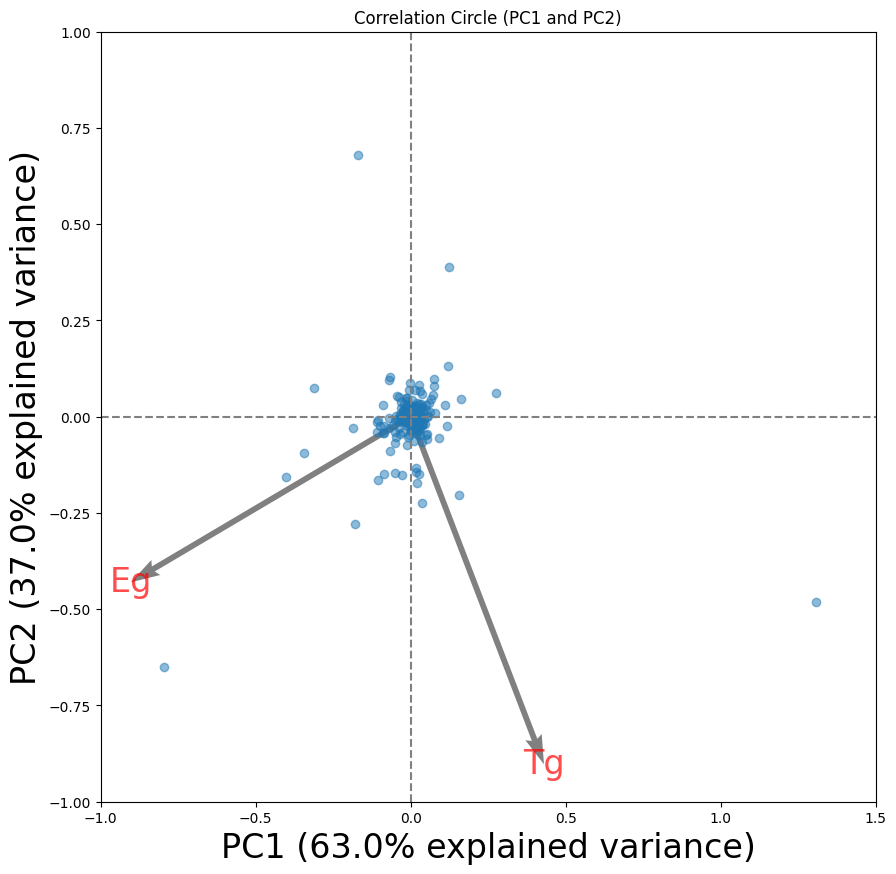

In [ ]:
pcs = pca.components_
display_circles(pcs, 2, pca, [(0,1)], labels = np.array(['Tg','Eg'],),)

Most substructures are located near the origin, indicating the difficulty in differentiating their contributions to different properties. The property $T_g$ is nearly orthogonal to the other property $E_g$, indicating the challenge of adjusting $T_g$ while adjusting $E_g$ in a polymer.


In [ ]:
shap_All_reset = shap_All.reset_index(drop=True)
df_pca['substructures'] = shap_All_reset['Variable']
df_pca

,PC1,PC2,substructures
0,1.308097,-0.481462,17470
1,-0.169930,0.679423,24312
2,0.122568,0.389560,24840
3,0.154365,-0.204157,20702
4,-0.796770,-0.650494,18014
...,...,...,...
919,-0.003986,0.000962,11793
920,-0.003657,0.001543,4779
921,0.001989,0.004232,18881
922,-0.000149,0.003183,11108


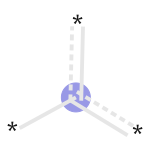

In [ ]:
# View the substructure represented by each bit of the Morgan Fingerprint

# Select a specific bit
bit = 17470

for i in range(6000):
    mol = Chem.MolFromSmiles(Tg_df.loc[i,'Smiles'])
    # Get the bit information of the Morgan fingerprint
    bi = {}
    fp = rdMolDescriptors.GetMorganFingerprint(mol, radius=3, bitInfo=bi)
    fp_n = fp.GetNonzeroElements()
    Code = (Corr_df[Corr_df['index'] == bit][0].values[0])
    if Code in fp_n.keys():
        img = Draw.DrawMorganBit(mol,Code,bi)

        break
img